# Домашнее задание 1

Дедлайн по отправке - 02:00 13 февраля 2021. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1 (7 pts)

__1.__ Скачайте с помощью кода, приведённого ниже, набор фотографий и нарисуйте какую-нибудь из них.

In [2]:
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np
import cvxpy as cvx

Shape of data = (400, 64, 64)
[[0.1983471  0.19421488 0.19421488 ... 0.58264464 0.5123967  0.45867768]
 [0.21900827 0.21900827 0.21487603 ... 0.5661157  0.5123967  0.45041323]
 [0.23966943 0.23966943 0.23966943 ... 0.59090906 0.5        0.46280992]
 ...
 [0.13636364 0.14049587 0.16115703 ... 0.76033056 0.7644628  0.7355372 ]
 [0.14876033 0.14876033 0.14876033 ... 0.76033056 0.75619835 0.74380165]
 [0.14876033 0.14876033 0.14876033 ... 0.75206614 0.75206614 0.73966944]]


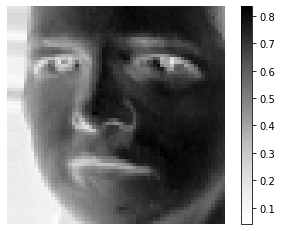

In [40]:
print("Shape of data = {}".format(data["images"].shape))
index = 3
print(data["images"][index])
plt.imshow(data["images"][index], cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

__2.__ Одним из способов обработки изображений, например для выделения наиболее важных сегментов используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Вопросы**

1) (1 pts) является ли эта задача выпуклой и почему?

2) (1 pts) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

**Решение**

1) Задача невыпукла, так как невыпукла целевая функция. Рассмотрим следующие матрицы:
* $H_1$: $h_{11} = 2$, остальные элементы равны $0$
* $H_2 = \mathbf{0}$
* $W_1 = \mathbf{0}$
* $W_2$: $w_{11}=6x_{11}$, остальные элементы равны $0$

Тогда 

* $W_1H_1 = W_2H_2=\mathbf{0}$ 

* $\frac{H_1+H_2}{2}$ --- такая матрица, что $\left(\frac{H_1+H_2}{2}\right)_{11}=1$ и остальные элементы равны $0$
* $\frac{W_1+W_2}{2}$ --- такая матрица, что $\left(\frac{W_1+W_2}{2}\right)_{11}=3x_{11}$ и остальные элементы равны $0$
* $\frac{H_1+H_2}{2}\frac{W_1+W_2}{2}$ --- такая матрица, что $\left(\frac{H_1+H_2}{2}\frac{W_1+W_2}{2}\right)_{11}=3x_{11}$ и остальные элементы равны $0$

Теперь проверим определение выпуклости

$$\frac{1}{2}f(H_1,W_1) +\frac{1}{2}f(H_2,W_2) = \frac{1}{2}||X-W_1H_1||_F^2 + \frac{1}{2}||X-W_2H_2||_F^2 = ||X||_F^2 = \sum\limits_{i,j} x_{ij}$$

$$f\left(\frac{H_1+H_2}{2},\frac{W_1+W_2}{2}\right) = (x_{11}-3x_{11})^2 + \sum\limits_{(i,j) \neq (1,1)} x_{ij}$$

То есть, $\frac{1}{2}f(H_1,W_1) +\frac{1}{2}f(H_2,W_2) < f\left(\frac{H_1+H_2}{2},\frac{W_1+W_2}{2}\right)$.

2) $H$ можно интерпретировать как набор неких особенностей лиц в целом. Мы выбрали какие-то $k$ характеристик (грубо говоря, на изображении могут выделяться усы, нос, глаза) и для каждой из характеристик записали, каким  образом они отражаются в каждом из пикселей (опять же, грубо говоря, усы у нас выделяются в виде горизонтальной полоски примерно посередине изображения, поэтому в этой полоске у нас будут числа больше, чем в остальных пикселях). И таким образом мы получили матрицу $H \in \mathbb{R}^{k \times n}$. А затем для каждого изображения мы записываем строчку из $k$ чисел, и чем больше $i$-тое число, тем сильнее выделяется $i$-тый признак на данном изображении (если у человека нет усов, то число, соответствующее усам будет поменьше, и наоборот). И так у нас есть строчка из $k$ чисел для каждого  из $m$ изображений, то есть матрицу $W \in \mathbb{R}^{m \times k}$. 

$H$ это, по сути одна из общих частей изображений, а так как изображения кодируются неотрицательными числами, то и все числа в $H$ неотрицательны. А в силу того, что элементы матрицы $X$ неотрицательны, то надо бы чтобы элементы матрицы $H$ были просуммированы с неотрицательными коэффициентами. Поэтому и $ W \geq 0$.

__3.__ Такую задачу можно решать с помощью CVXPy, если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях решить точно задачу относительно параметра $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и найти решение задачи относительно $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами. От инициализации будет сильно зависеть качество решения и скорость работы методов.

**Задачи**

1) (2 pts) реализуйте с помощью CVXPy идею попеременной оптимизации для этой задачи и решите её

2) (1 pts) нарисуйте график сходимости по функции и убедитесь, что метод сошёлся или же изменение целевой функции пренебрежимо мало

3) (1 pts) поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10-50 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос 2) предыдущего пункта? Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

4) (1 pts) Нарисуйте матрицу $W$ с помощью функции ```plt.imshow``` или ```plt.spy```. Насколько сильно она заполнена и почему?

Реализуем попеременную оптимизацию. При этом матрицу $H$ вначале инициализируем первыми 10 картинками.

In [9]:
X = data["images"].reshape((400, 64*64))
k = 10

#H = np.random.random((k, 64*64))
H = X[0:k, :]

for iter_num in range(1, 31):
    if i % 2 == 1:
        W = cvx.Variable((400, k))
        constraint = [W >= 0]
    else:
        H = cvx.Variable((k, 64*64))
        constraint = [H >= 0]
    print('Iteration {}'.format(i))
    
    obj = cvx.Minimize(cvx.norm(X - W*H, 'fro'))
    prob = cvx.Problem(obj, constraint)
    prob.solve(verbose=True, solver='SCS')

    if iter_num % 2 == 1:
        W = W.value
    else:
        H = H.value

C:\Users\troma\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.05e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.51e+20  3.21e+20  1.00e+00 -5.10e+21  1.01e+23  8.58e+22  4.24e-01 
   100| 2.27e-04  6.79e-03  2.29e-04  1.60e+02  1.60e+02  2.41e-16  1.36e+01 
   200| 5.21e-05  1.55e-03  5

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.99e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 9.17e+21  9.49e+21  1.00e+00 -6.59e+23  2.67e+24  3.94e+22  2.84e-01 
    40| 8.25e-05  9.98e-05  2.76e-06  1.24e+02  1.24e+02  2.03e-14  4.95e+00 
---------------------------

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.17e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 3.61e+20  5.98e+20  1.00e+00 -1.19e+22  1.34e+23  1.10e+23  4.61e-01 
   100| 5.73e-04  1.32e-02  1.05e-03  1.18e+02  1.18e+02  1.13e-15  1.45e+01 
   200| 1.51e-04  3.81e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.97e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.83e+21  6.04e+21  1.00e+00 -5.89e+23  1.58e+24  5.59e+23  2.70e-01 
   100| 9.80e-05  5.70e-05  1.07e-05  1.15e+02  1.15e+02  7.27e-15  1.26e+01 
---------------------------

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.11e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.44e+20  7.19e+20  1.00e+00 -1.46e+22  1.56e+23  1.28e+23  4.52e-01 
   100| 6.10e-04  1.40e-02  1.22e-03  1.12e+02  1.13e+02  5.86e-20  1.34e+01 
   200| 1.52e-04  4.12e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.32e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.00e+21  5.13e+21  1.00e+00 -5.30e+23  1.29e+24  5.81e+23  2.70e-01 
   100| 1.62e-04  6.79e-05  2.28e-05  1.12e+02  1.12e+02  1.02e-14  1.25e+01 
   120| 8.17e-05  3.55e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.03e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.96e+20  8.00e+20  1.00e+00 -1.63e+22  1.73e+23  1.40e+23  4.23e-01 
   100| 5.72e-04  1.38e-02  1.16e-03  1.10e+02  1.11e+02  1.16e-15  1.38e+01 
   200| 1.48e-04  4.19e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.14e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.76e+21  4.86e+21  1.00e+00 -5.11e+23  1.19e+24  5.72e+23  2.72e-01 
   100| 2.29e-04  8.26e-05  3.32e-05  1.10e+02  1.10e+02  1.86e-14  1.17e+01 
   140| 6.61e-05  2.48e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.06e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.35e+20  8.59e+20  1.00e+00 -1.76e+22  1.85e+23  1.50e+23  3.93e-01 
   100| 5.22e-04  1.34e-02  1.06e-03  1.09e+02  1.09e+02  2.30e-15  1.32e+01 
   200| 1.39e-04  4.11e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.43e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.58e+21  4.67e+21  1.00e+00 -4.97e+23  1.13e+24  5.65e+23  5.17e-01 
   100| 3.02e-04  9.86e-05  4.36e-05  1.09e+02  1.09e+02  9.75e-15  1.42e+01 
   140| 9.74e-05  3.20e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.17e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.68e+20  9.12e+20  1.00e+00 -1.87e+22  1.95e+23  1.58e+23  5.06e-01 
   100| 4.79e-04  1.30e-02  9.72e-04  1.08e+02  1.09e+02  1.98e-15  1.40e+01 
   200| 1.30e-04  3.99e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.02e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.43e+21  4.52e+21  1.00e+00 -4.86e+23  1.08e+24  5.59e+23  2.78e-01 
   100| 3.61e-04  1.09e-04  5.19e-05  1.09e+02  1.09e+02  8.92e-15  1.18e+01 
   160| 7.50e-05  2.17e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.11e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.99e+20  9.65e+20  1.00e+00 -1.96e+22  2.06e+23  1.67e+23  5.33e-01 
   100| 4.44e-04  1.28e-02  9.03e-04  1.08e+02  1.08e+02  5.67e-16  1.48e+01 
   200| 1.21e-04  3.89e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.99e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.30e+21  4.38e+21  1.00e+00 -4.76e+23  1.04e+24  5.54e+23  2.66e-01 
   100| 4.05e-04  1.16e-04  5.76e-05  1.08e+02  1.08e+02  7.14e-17  1.18e+01 
   160| 8.92e-05  2.37e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.03e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.28e+20  1.02e+21  1.00e+00 -2.04e+22  2.16e+23  1.75e+23  4.18e-01 
   100| 4.18e-04  1.28e-02  8.51e-04  1.08e+02  1.08e+02  6.03e-16  1.30e+01 
   200| 1.13e-04  3.77e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.96e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.18e+21  4.26e+21  1.00e+00 -4.67e+23  1.00e+24  5.49e+23  3.40e-01 
   100| 4.35e-04  1.19e-04  6.07e-05  1.08e+02  1.08e+02  7.86e-18  1.16e+01 
   160| 9.92e-05  2.49e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.01e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.52e+20  1.06e+21  1.00e+00 -2.11e+22  2.25e+23  1.81e+23  4.07e-01 
   100| 4.00e-04  1.28e-02  8.13e-04  1.07e+02  1.08e+02  5.88e-18  1.30e+01 
   200| 1.09e-04  3.71e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.95e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 5.07e+21  4.15e+21  1.00e+00 -4.60e+23  9.72e+23  5.44e+23  3.44e-01 
   100| 4.55e-04  1.19e-04  6.15e-05  1.08e+02  1.08e+02  1.26e-14  1.19e+01 
   180| 6.78e-05  1.58e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.02e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.74e+20  1.09e+21  1.00e+00 -2.17e+22  2.33e+23  1.87e+23  4.12e-01 
   100| 3.86e-04  1.28e-02  7.81e-04  1.07e+02  1.07e+02  1.21e-15  1.34e+01 
   200| 1.07e-04  3.74e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.38e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.96e+21  4.04e+21  1.00e+00 -4.52e+23  9.44e+23  5.39e+23  2.90e-01 
   100| 4.65e-04  1.17e-04  6.04e-05  1.07e+02  1.07e+02  4.04e-15  1.29e+01 
   180| 7.11e-05  1.59e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.01e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6.94e+20  1.13e+21  1.00e+00 -2.23e+22  2.39e+23  1.92e+23  3.86e-01 
   100| 3.73e-04  1.28e-02  7.51e-04  1.07e+02  1.07e+02  1.21e-15  1.29e+01 
   200| 1.06e-04  3.78e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.05e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.86e+21  3.94e+21  1.00e+00 -4.46e+23  9.18e+23  5.34e+23  2.66e-01 
   100| 4.75e-04  1.16e-04  5.90e-05  1.07e+02  1.07e+02  1.21e-14  1.17e+01 
   180| 7.50e-05  1.63e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.08e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.11e+20  1.15e+21  1.00e+00 -2.29e+22  2.45e+23  1.97e+23  4.29e-01 
   100| 3.61e-04  1.28e-02  7.21e-04  1.07e+02  1.07e+02  9.12e-16  1.35e+01 
   200| 1.06e-04  3.80e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.01e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.78e+21  3.86e+21  1.00e+00 -4.40e+23  8.96e+23  5.30e+23  2.67e-01 
   100| 4.78e-04  1.14e-04  5.77e-05  1.07e+02  1.07e+02  1.20e-14  1.21e+01 
   180| 7.38e-05  1.62e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.30e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.25e+20  1.18e+21  1.00e+00 -2.34e+22  2.49e+23  2.00e+23  3.89e-01 
   100| 3.50e-04  1.28e-02  6.91e-04  1.07e+02  1.07e+02  2.02e-15  1.32e+01 
   200| 1.06e-04  3.81e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.13e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.69e+21  3.78e+21  1.00e+00 -4.34e+23  8.76e+23  5.25e+23  3.07e-01 
   100| 4.87e-04  1.13e-04  5.66e-05  1.07e+02  1.07e+02  3.87e-15  1.17e+01 
   180| 7.42e-05  1.64e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.03e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.37e+20  1.20e+21  1.00e+00 -2.38e+22  2.53e+23  2.03e+23  3.89e-01 
   100| 3.38e-04  1.27e-02  6.61e-04  1.06e+02  1.07e+02  1.07e-15  1.29e+01 
   200| 1.06e-04  3.83e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 3.25e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.63e+21  3.72e+21  1.00e+00 -4.30e+23  8.60e+23  5.22e+23  2.86e-01 
   100| 4.99e-04  1.13e-04  5.60e-05  1.07e+02  1.07e+02  2.34e-16  1.27e+01 
   180| 7.56e-05  1.66e-05 

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16388001
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 4001, constraints m = 1642401
Cones:	linear vars: 4000
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.28e+01s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.46e+20  1.21e+21  1.00e+00 -2.41e+22  2.56e+23  2.05e+23  4.61e-01 
   100| 3.28e-04  1.25e-02  6.33e-04  1.06e+02  1.06e+02  1.23e-16  1.40e+01 
   200| 1.05e-04  3.84e-03  2

C:\Users\troma\miniconda3\lib\site-packages\cvxpy\expressions\expression.py:550: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.

  warnings.warn(__STAR_MATMUL_WARNING__, UserWarning)


----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 16424961
eps = 1.00e-04, alpha = 1.50, max_iters = 10000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 40961, constraints m = 1679361
Cones:	linear vars: 40960
	soc vars: 1638401, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.97e+00s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 4.58e+21  3.67e+21  1.00e+00 -4.26e+23  8.46e+23  5.18e+23  3.40e-01 
   100| 5.11e-04  1.12e-04  5.54e-05  1.07e+02  1.07e+02  3.67e-15  1.17e+01 
   180| 7.81e-05  1.69e-05 

Нарисуем все картинки из матрицы $H$. В силу того, что $k$ слишком мало, эти картинки являются лишь какими-то очертаниями лиц, по-видимому, наиболее распространёнными.

'for index in range(5):\n    for j in range(2):\n        axes[index][j].imshow(features[index][j], cmap=plt.cm.Greys)\n        plt.colorbar()\n        _ = plt.axis("off")'

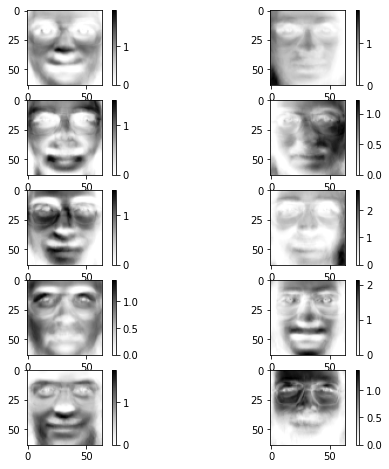

In [29]:
features = H.reshape((10, 64, 64))

fig=plt.figure(figsize=(8, 8))

for i in range(1, 11):
    fig.add_subplot(5, 2, i)
    plt.imshow(features[i-1], cmap=plt.cm.Greys)
    plt.colorbar()

Нарисуем матрицу $W$. Она слабо заполнена, так как каждому из 400 лиц соответствует лишь небольшая часть из наиболее распространённых очертаний (эти очертания представлены в матрице $H$). Заметим, что наверху этой матрицы темнее выделяется диагональ. Это связано с тем, что в качестве начальной матрицы $H$ мы брали как раз первые 10 изображений, и это их след.

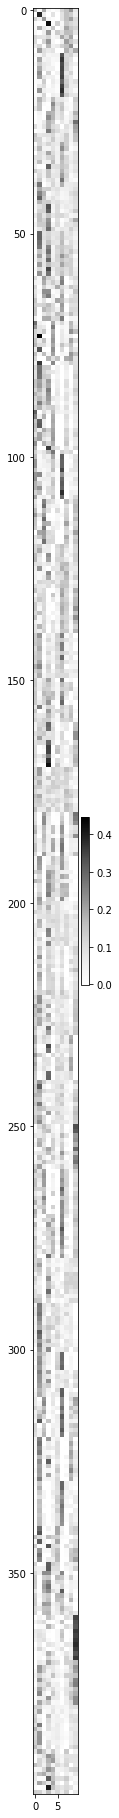

In [41]:
fig=plt.figure(figsize=(1, 40))
plt.imshow(W, cmap=plt.cm.Greys)
plt.colorbar()

Теперь, для сравнения, заполним матрицу $H$ рандомными элементами, равномерно распределёнными на отрезке $[0,1]$. Как видим, здесь тоже очертания лиц, только черты в целом менее чёткие.

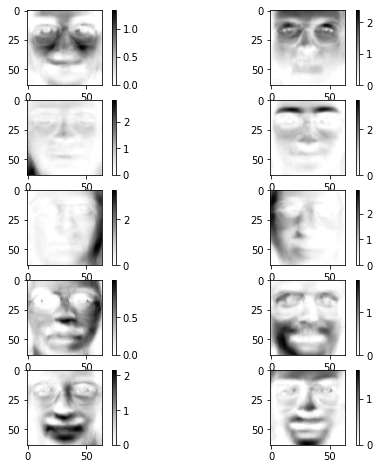

In [63]:
features = H1.reshape((10, 64, 64))

fig=plt.figure(figsize=(8, 8))

for i in range(1, 11):
    fig.add_subplot(5, 2, i)
    plt.imshow(features[i-1], cmap=plt.cm.Greys)
    plt.colorbar()

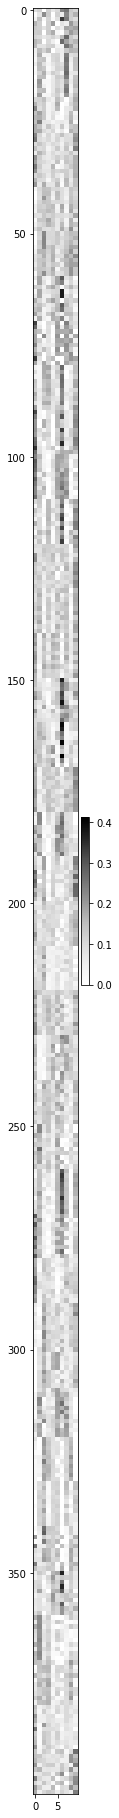

In [65]:
fig=plt.figure(figsize=(1, 40))
plt.imshow(W1, cmap=plt.cm.Greys)
plt.colorbar()

## Задача 2 (14 pts)

### Управление посадкой космического корабля

В данной задаче вам предлагается поставить две задачи, связанные с посадкой ракеты.
Первая задача про то, как сэкономить топливо, вторая - про то как совершить посадку максимально быстро.
Про то, как идеи из этой задачи реализуются см. [тут](https://www.youtube.com/watch?v=2t15vP1PyoA)

В данной задаче предполагаем, что динамика челнока описывается вторым законом Ньютона

$$
mx''(t) = f(t) - mge_3,
$$

где $e_3$ - вектор $(0, 0, 1)$, $m$ - масса, предполагаем, что постоянная (отказ от этого предположения приводит к более сложной динамике), $f(t)$ - сила тяги, которую можно регулировать, $x''(t)$ - ускорение.
Также не учитываем влияние атмосферы.
Это уравнение векторное, то есть $x(t)$ и $f(t)$ - это трёхмерные векторы в каждый момент времени. 

#### Уравнения динамики получаем после дискретизации основного уравнения динамики

Для скорости получим

$$
m\frac{v_{k+1} - v_k}{h} = f_k - mge_3, \quad v_{k+1} = v_k + \frac{h}{m} f_k - hge_3
$$

аналогично для координат

$$
x' = v \quad x_{k+1} = x_k + \frac{h}{2}(v_k + v_{k+1})
$$

Схема дискретизации для связи координат и скорости получена с помощью [метода Рунге-Кутты 2-го порядка](http://web.mit.edu/10.001/Web/Course_Notes/Differential_Equations_Notes/node5.html). Подробности по этот метод будут изложены на курсе вычислительной математике. 

Точка посадки имеет координаты $(0, 0, 0)$ и для успешной посадки необходима нулевая скорость в момент посадки. Также в процессе посадки необходимо чтобы челнок не "сваливался", то есть значение координаты по высоте было больше своей проекции на плоскость $(x, y)$ в заданное число раз, то есть

$$
x_3(t) \geq \alpha \| (x_1(t), x_2(t)) \|_2.
$$

Поскольку сила тяги создаётся двигателем, который потребляет топливо, поэтому есть некоторая максимальная сила тяги, доступная кораблю, то есть

$$
\|f(t)\|_2 \leq F_{\max}.
$$

Также объём потребляемого топлива для развития силы $f(t)$ можно вычислить по формуле

$$
\gamma \int_0^T \|f(t)\|_2 dt,
$$

 где $\gamma$ - коэффициент потребления топлива, $T$ - время посадки. 
 
При дискретизации по времени можно считать, что $f(t)$ постоянно на каждом интервале $[(k-1)h; kh]$ для $k=1,\ldots,K$. Таким образом общее время посадки равно $Kh$. 

**Пункт 1**
Найти положение, скорость и силу тяги в каждый момент времени такие что общее потребление топлива минимально

1) (2 pts) Поставьте формально задачу оптимизации

2) (3 pts) Решите её с помощью CVXPy и визуализируйте решение

**Пункт 2**
Определить минимальное время, за которое можно посадить челнок, то есть при фиксированном шаге дискретизации по времени $h$, нужно найти минимальное финальное время, за которое можно привести корабль в финальную точку с финальной скоростью.
Для решения этой задачи допускается решение нескольких вспомогательных задач.

3) (5 pts) Поставьте формально задачу оптимизации

4) (4 pts) Решите её с помощью CVXPy и визуализируйте решение. Сравните, полученную траекторию, с траекторией из пункта 1. 
Как сильно требование по минимальности времени увеличивает объём потребления топлива?

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
import cvxpy as cvx

# Time discretiztion step
h = 1.
# Gravity acceleration. It is just demo value to scale the solution time!
g = 0.1
# Mass
m = 10.
# Maximum norm of forse
Fmax = 10.
# Initial position
p0 = np.array([50, 50, 100])
# Initial velocity
v0 = np.array([-10, 0, -10])
# Factor of minimum slope
alpha = 0.5
# Fuel consumption factor
gamma = 1.
# Number of discretization steps, i.e. final time equals K*h
K = 35

**Решение**

**Пункт 1**

Нам нужно минимизировать интеграл $
\gamma \int_0^T \|f(t)\|_2 dt,
$. После дискретизации получим сумму:

$$\gamma\sum\limits_{k=1}^{35} \|f_k\|_2 h =  \gamma\sum\limits_{k=1}^{K} \sqrt{ (f^1_k)^2+(f^2_k)^2+(f^3_k)^2 } h $$

Для того, чтобы задача была выпуклой, нам необходимо, чтобы целевая функция была выпукла. Поэтому сделаем целевой функцию 

$$\gamma h\sum\limits_{k=1}^{35}  (f^1_k)^2+(f^2_k)^2+(f^3_k)^2  $$

Для скорости имеем

$$v_{k+1} = v_k + \frac{h}{m} f_k - hge_3, (1)$$

Подставим $v_{k+1}$: 

$$
x_{k+1} = x_k + \frac{h}{2}(v_k + v_{k+1}) = v \quad x_{k+1} = x_k + \frac{h}{2}(v_k + v_k + \frac{h}{m} f_k - hge_3) = x_k + hv_k+
\frac{h^2}{2m}f_k - \frac{h^2}{g}e_3
$$

Переобозначим $x \Rightarrow p$. Тогда 

$$
p_{k+1} = p_k + \frac{h}{2}(v_k + v_{k+1}) = v \quad p_{k+1} = p_k + \frac{h}{2}(v_k + v_k + \frac{h}{m} f_k - hge_3) = p_k + hv_k+
\frac{h^2}{2m}f_k - \frac{h^2}{g}e_3, (2)
$$

Обозначим

$$x_k = \begin{bmatrix} p^1_k \\ p^2_k\\ p^3_k\\ v^1_k\\ v^2_k\\ v^3_k \end{bmatrix}$$

Нам нужно записать эти рекуррентные соотношения в виде $x_{k+1} = Ax_k+Bf_k+C$. Получается

\begin{equation}
A = 
\begin{bmatrix}
1  0  0  h  0  0\\
0  1  0  0  h  0\\
0  0  1  0  0  h \\
0  0  0  1  0  0 \\
0  0  0  0  1  0\\
0  0  0  0  0  1
\end{bmatrix}
\end{equation}



$$
B = $$
$$\frac{h^2}{2m} \hspace{10mm}  0 \hspace{10mm} 0$$
$$0 \hspace{10mm} \frac{h^2}{2m} \hspace{10mm} 0 $$ 
$$0 \hspace{10mm} 0 \hspace{10mm} \frac{h^2}{2m}$$ 
$$\frac{h}{m} \hspace{10mm} 0 \hspace{10mm} 0 $$
$$0 \hspace{10mm} $\frac{h}{m} \hspace{10mm} 0$$
$$0\hspace{10mm} 0 \hspace{10mm} \frac{h}{m}$$


$$C = \begin{bmatrix} 0 \\ 0\\ -\frac{h^2g}{2}\\ 0\\ 0\\ -hg \end{bmatrix}$$

Получаем задачу минимизации

$$
\begin{align*}
& \min \sum\limits_{k=1}^{K}  (f^1_k)^2+(f^2_k)^2+(f^3_k)^2\\
\text{s.t.}\ \  & x_0 = \begin{bmatrix} p_0\\ v_0 \end{bmatrix} &\\
& x_K = \mathbf{0} & \\
& x_{k+1} = Ax_k+Bf_k+C & k = 0, \dots, K-1\\
& (x^3_k)^2 \geq \alpha^2 ((x^2_k)^2 + (x^1_k)^2)& k = 0, \dots, K-1\\
& (f^1_k)^2+(f^2_k)^2+(f^3_k)^2 \leq F_{max}^2& k = 0, \dots, K-1
\end{align*}
$$

In [86]:
x = cvx.Variable((6, K + 1))
f = cvx.Variable((3, K))

A = np.array([[1, 0, 0, h, 0, 0],
              [0, 1, 0, 0, h, 0],
              [0, 0, 1, 0, 0, h],
              [0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]
])
B = np.array([[h**2/2/m, 0, 0],
             [0, h**2/2/m, 0],
             [0, 0, h**2/2/m],
             [h/m, 0, 0],
             [0, h/m, 0],
             [0, 0, h/m]])
C = np.array([
    0, 0, -h**2*g/2, 0, 0, -h*g
])

states = []
for k in range(K):
    cost = gamma * h * (cvx.sum_squares(f[:, k]))
    constr = [x[:, k+1] == A@x[:, k] + B@f[:, k] + C, alpha * cvx.norm( cvx.multiply(np.array([1, 1, 0, 0, 0, 0]), x[:, k]), 2) <= x[:, k] @ np.array([0,0,1,0,0,0]),  cvx.sum_squares(f[:, k]) <= Fmax**2]
    states.append(cvx.Problem(cvx.Minimize(cost), constr))
prob0 = sum(states)
complete_constr = prob0.constraints + [x[:,0] == np.concatenate([p0, v0]), x[:, K] == np.zeros(6)]
prob = cvx.Problem(prob0.objective, complete_constr)
prob.solve(verbose=True)
print("Примерное количество минимально возможного потребления топлива", cost.value**0.5)


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +3.079e-22  -3.512e+03  +7e+03  2e-01  2e-01  1e+00  4e+01    ---    ---    1  1  - |  -  - 
 1  +2.716e+01  -8.433e+02  +2e+03  4e-02  3e-02  3e+00  1e+01  0.7795  9e-02   1  1  1 |  0  0
 2  +9.199e+01  -6.569e+02  +1e+03  4e-02  2e-02  4e+00  8e+00  0.4991  4e-01   1  1  1 |  0  0
 3  +1.482e+02  -4.361e+02  +9e+02  4e-02  1e-02  7e+00  5e+00  0.8407  5e-01   1  1  1 |  0  0
 4  +2.436e+02  -1.288e+02  +5e+02  2e-02  5e-03  6e+00  3e+00  0.6857  4e-01   1  1  1 |  0  0
 5  +3.091e+02  -1.063e+01  +3e+02  2e-02  4e-03  6e+00  2e+00  0.6504  5e-01   1  1  2 |  0  0
 6  +5.723e+02  +4.587e+02  +9e+01  1e-02  1e-03  4e+00  5e-01  0.7928  6e-02   1  1  1 |  0  0
 7  +5.932e+02  +4.835e+02  +8e+01  1e-02  1e-03  3e+00  4e-01  0.1941  5e-01   2  1  1 |  0  0
 8  +5.944e+02  +4.820e+02  +8e+01  1e-02  1e-

In [ ]:
# use the following code to plot your trajectories
# and the glide cone (don't modify)
# -------------------------------------------------------
fig = plt.figure()
ax = fig.gca(projection='3d')

X = np.linspace(-40, 55, num=30)
Y = np.linspace(0, 55, num=30)
X, Y = np.meshgrid(X, Y)
Z = alpha*np.sqrt(X**2+Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
#Have your solution be stored in p, which means positions
# ax.plot(xs=p.value[0,:],ys=p.value[1,:],zs=p.value[2,:], c="red")
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.tight_layout()

**Пункт 2**

Если мы хотим минимизировать время, при фиксированном шаге дискретизации, это значит, что надо найти минимально возможное $K$. 

$$
\begin{align*}
& \min\ \ K\\
\text{s.t.}\ \  & x_0 = \begin{bmatrix} p_0\\ v_0 \end{bmatrix} &\\
& x_K = \mathbf{0} & \\
& x_{k+1} = Ax_k+Bf_k+C & k = 0, \dots, K-1\\
& (x^3_k)^2 \geq \alpha^2 ((x^2_k)^2 + (x^1_k)^2)& k = 0, \dots, K-1\\
& (f^1_k)^2+(f^2_k)^2+(f^3_k)^2 \leq F_{max}^2& k = 0, \dots, K-1
\end{align*}
$$

Делать это можно, например, бинарным поиском. Каждый раз нам нужно просто узнать, существует ли оптимальное решение. Поэтому, можно в качестве целевой функции рассматривать константу. Тогда если решение существует, солвер выдаст в качестве оптимального решения саму константу, а иначе выдаст $inf$. Таким образом, на каждой итерации бинпоиска задача выглядит так:

$$
\begin{align*}
& \min\ \ 0\\
\text{s.t.}\ \  & x_0 = \begin{bmatrix} p_0\\ v_0 \end{bmatrix} &\\
& x_K = \mathbf{0} & \\
& x_{k+1} = Ax_k+Bf_k+C & k = 0, \dots, K-1\\
& (x^3_k)^2 \geq \alpha^2 ((x^2_k)^2 + (x^1_k)^2)& k = 0, \dots, K-1\\
& (f^1_k)^2+(f^2_k)^2+(f^3_k)^2 \leq F_{max}^2& k = 0, \dots, K-1
\end{align*}
$$

In [87]:
A = np.array([[1, 0, 0, h, 0, 0],
              [0, 1, 0, 0, h, 0],
              [0, 0, 1, 0, 0, h],
              [0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]
])
B = np.array([[h**2/2/m, 0, 0],
             [0, h**2/2/m, 0],
             [0, 0, h**2/2/m],
             [h/m, 0, 0],
             [0, h/m, 0],
             [0, 0, h/m]])
C = np.array([
    0, 0, -h**2*g/2, 0, 0, -h*g
])

b = 35
a = 0
while b - a > 1:
    K = (b+a)//2
    x = cvx.Variable((6, K + 1))
    f = cvx.Variable((3, K))
    states = []
    for k in range(K):
        cost = gamma * h * (cvx.sum_squares(f[:, k]))
        constr = [x[:, k+1] == A@x[:, k] + B@f[:, k] + C, alpha * cvx.norm( cvx.multiply(np.array([1, 1, 0, 0, 0, 0]), x[:, k]), 2) <= x[:, k] @ np.array([0,0,1,0,0,0]),  cvx.sum_squares(f[:, k]) <= Fmax**2]
        states.append(cvx.Problem(cvx.Minimize(cost), constr))
    prob0 = sum(states)
    complete_constr = prob0.constraints + [x[:,0] == np.concatenate([p0, v0]), x[:, K] == np.zeros(6)]
    prob = cvx.Problem(prob0.objective, complete_constr)
    prob.solve()
    if prob.value < np.inf:
        FinalCost = cost.value
        b = K
    else:
        a = K

print("Минимальное количество интервалов", b)
print("При этом потребляется топлива приблизительно", FinalCost**0.5)

Минимальное количество интервалов 25
При этом потребляется топлива 10.000000114405909


Как видно, потребление топлива заметно увеличилось.

## Задача 3. (12 pts)
### Задача об изоморфизме графов

Пусть даны два графа $G_A$ и $G_B$ с матрицами смежности $A$ и $B$ соответственно. [Задача об изоморфизме графов](https://en.wikipedia.org/wiki/Graph_isomorphism_problem) состоит в поиске такой матрицы перестановки $P$, что выполнено

$$
PAP^{\top} = B.
$$

На данный момент неизвестно является ли эта задача NP-полной или лежит в классе P.

1) (4 pts) запишите ограничения на искомую матрицу $P$ и покажите, что задача об изоморфизме графа может быть записана как бинарная задачу линейного программирования, то есть как задача линейного программирования, в которой элементами решения могут быть только 0 и 1. (**Hint**: подумайте как задачу о существовании некоторого элемента в множестве записать в виде задачи оптимизации)

2) (4 pts) далее рассмотрите релаксацию поставленной задачи, в которой элементы решения могут принимать значения в отрезке $[0, 1]$. Если решение такой задачи не нашлось, то это значит, что графы не изоморфны. Если решение нашлось и элементы решения только 0 или 1, то найдена искомая перестановка. Конечно, такое случается достаточно редко. Чтобы форсировать бинарность элементов решения, к целевой функции исходной задачи можно добавить слагаемое вида $\langle W, P \rangle$, где $W$ некоторая случайная матрица, например с элементами из $\mathcal{N}(0, 1)$ (возможно использование других распределений). Добавление такого слагаемого не повлияет на решение вопроса существования перестановки. 

3) (4 pts) Убедитесь, что графы с матрицами смежности, заданными [тут](https://web.stanford.edu/~boyd/cvxbook/cvxbook_additional_exercises/graph_isomorphism_data.py), являются изоморфными. Для поиска матрицы перестановки, возможно, необходимо решать несколько задач линейного программирования для разных матриц $W$. Также рассмотрите несколько распределений для генерации матрицы $W$. Убедитесь, что найденная матрица действительно является матрицей перестановки. Для проверки бинарности элементов можно отслеживать величину $\max_{(i, j)} P_{ij}(1 - P_{ij})$. После обнаружения матрицы перестановки выведите результат умножения матрицы $P^*$ на вектор $[1, 2, \ldots, n]$ для демонстрации того, как надо переставить вершины исходного графа.

**Решение**
1) Матрица перехода имеет следующие свойства:
* $p_{ij} \in \{0, 1\}$, это записывается как $p_{ij}(1-p_{ij})=0$
* В каждом столбце и в каждой строке ровно одна единица. Это можно записать как $P\mathbf{1}=\mathbf{1}$, $P^{\top}\mathbf{1}=\mathbf{1}$

Задачу оптимизации можно поставить следующим образом:
$$\begin{align*}
& \min\limits_P\ 0 &\\
\text{s.t.}\ \  & p_{ij}(1-p_{ij})=0 & i,j = 1, \dots, n\\
& P\mathbf{1}=\mathbf{1} & \\
& P^{\top}\mathbf{1}=\mathbf{1} &\\
& PAP^{\top} = B &
\end{align*}$$

При этом если такая матрица $P$ существует, то задача имеет решение. В противном случае решения нет.

2) При релаксации мы убираем требование на целочисленность, но зато добавляем неравенства. При этом получается задача

$$\begin{align*}
& \min\limits_P\ <W,P> &\\
\text{s.t.}\ \ & P \geq 0 & \\
& P \leq 1 &\\
& P\mathbf{1}=\mathbf{1} & \\
& P^{\top}\mathbf{1}=\mathbf{1} &\\
& PAP^{\top} = B &
\end{align*}$$

Возможно, поможет достичь бинарности добавление в целевую функцию слагаемого $\sum\limits_{i,j}p_{ij}(1-p_{ij})=0 = \sum\limits_{i,j}p_{ij}-p_{ij}^2$, что есть 